In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

from sklearn.preprocessing import StandardScaler
from torchtext import data

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



In [382]:

# this needs to be cleaned up and data can be grouped in a more efficient way 

path= '/Users/tancredicp/Desktop/sailing_app/data/ML Training Resources/'
all_files = glob.glob(path + "/*.csv")


Data = []
for filename in all_files:
    
    
    
    
    # how many point from the start you have to throw away ?
    
    roll_param = '3s'
    offset =  1
    

    dfSpecific = pd.read_csv(filename, index_col=None, header=0)
    dfSpecific.fillna(0, inplace= True)
    dfSpecific['time'] = pd.to_datetime(dfSpecific['time']).dt.tz_localize(None)
    
    
    sogDelta = dfSpecific['sog'].diff() / dfSpecific['time'].diff().dt.total_seconds()
    cogDelta = (dfSpecific['sog'].diff() / dfSpecific['time'].diff().dt.total_seconds()).abs()
    
    dfFeatures = dfSpecific[['sog', 'time']]
    dfSpecific.set_index('time', drop=True)['sog'].rolling('3s').mean()
    


    # acceleration
    dfFeatures['sogDelta'] = sogDelta
    #dfFeatures[['sogDelta']].rolling(roll_param1, center = True).mean()
    dfFeatures['sogDeltaRoll'] =  dfFeatures.set_index('time', drop=True)[['sogDelta']].rolling(roll_param).mean()
    dfFeatures['sogDeltaRoll'].fillna(dfFeatures['sogDelta'], inplace=True)

    #change in direction
    dfFeatures['cogDelta'] = cogDelta
    dfFeatures['cogDeltaRoll'] = dfFeatures.set_index('time', drop=True)[['cogDelta']].rolling(roll_param).mean()
    dfFeatures['cogDeltaRoll'].fillna(dfFeatures['cogDelta'], inplace=True)
    
    dfFeatures.drop(columns = 'time', inplace = True)
    
    
    scaler = StandardScaler()
    arrayFeaturesScaled = scaler.fit_transform(dfFeatures)
    
    
    
    dfFeatures = pd.DataFrame(arrayFeaturesScaled, columns=dfFeatures.columns)
    
    #tags
    dfTag = dfSpecific[['tag']]
    dfTag.fillna(0, inplace= True)
    
    TAGS = data.Field(unk_token = None)
    TAGS.build_vocab(['0','A','B','C','D','G','S','T'])
    dfTag['tag'] = np.array(TAGS.numericalize((np.array(dfTag['tag']))))[0]
    
    dfFeatures['tag'] =  dfTag['tag']
    
    #drop first value since there will be nans for delta fields
    dfFeatures = dfFeatures[1:]
    Data.append(dfFeatures)

/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [386]:
MasterFrame = MasterFrame[MasterFrame['tag'] != 1]
MasterFrame = MasterFrame[MasterFrame['tag'] != 4]

['0','A','B','C','D','G','S','T']
mappingForManuevresVs = {2 : 0, 3 : 0, 5 : 0, 6 : 1, 7 : 0, 8: 1}
MasterFrame['tagSimple'] = MasterFrame['tag'].map(mappingForManuevresVs)

In [409]:
X = MasterFrame[['sog', 'sogDelta', 'sogDeltaRoll', 'cogDelta', 'cogDeltaRoll']]
y = MasterFrame[['tag']]

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 3, test_size = 0.8, shuffle = False)

In [411]:
RFC = RandomForestClassifier(n_estimators= 100)
RFC.fit(X_train,y_train)

/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [412]:
RFC.score(X_train, y_train), RFC.score(X_test, y_test)

(0.9635570232338719, 0.7795630767416493)

In [413]:
from sklearn.decomposition import PCA

In [417]:
X

,sog,sogDelta,sogDeltaRoll,cogDelta,cogDeltaRoll
1,1.511863,1.313892,1.313892,0.859728,0.859728
2,1.455773,-0.517251,-0.517251,-0.195728,-0.195728
3,1.615413,1.494994,1.494994,1.103294,1.103294
4,1.511863,-0.959945,-0.959945,0.399658,0.399658
5,1.427728,-0.778843,-0.778843,0.156091,0.156091
...,...,...,...,...,...
1797,0.740710,0.311922,0.311922,-0.574122,-0.574122
1798,0.941016,1.428367,1.428367,1.009480,1.009480
1799,1.141321,1.428367,1.428367,1.009480,1.009480
1800,1.232889,0.657005,0.657005,-0.084645,-0.084645


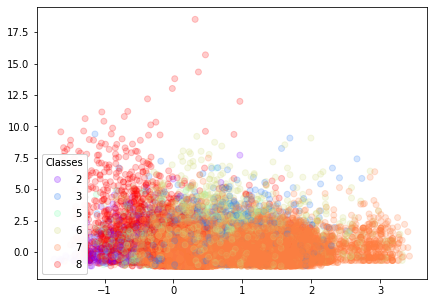

In [418]:
fig, ax = plt.subplots(figsize = (7,5))


c = MasterFrame['tag']
pca = PCA()
array = pca.fit_transform(X)
scatter = ax.scatter(MasterFrame['sog'], MasterFrame['cogDeltaRoll'], c=c, cmap = 'rainbow', alpha = 0.2, label = c)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

In [431]:

# this needs to be cleaned up and data can be grouped in a more efficient way 

path= '/Users/tancredicp/Desktop/sailing_app/data/ML Training Resources/'
all_files = glob.glob(path + "/*.csv")


Data = []
for filename in all_files:
    
    
    # how many point from the start you have to throw away ?
    
    roll_param = '3s'
    offset =  1
    

    dfSpecific = pd.read_csv(filename, index_col=None, header=0)
    dfSpecific.fillna(0, inplace= True)
    dfSpecific['time'] = pd.to_datetime(dfSpecific['time']).dt.tz_localize(None)
    
    
    sogDelta = dfSpecific['sog'].diff() / dfSpecific['time'].diff().dt.total_seconds()
    cogDelta = (dfSpecific['sog'].diff() / dfSpecific['time'].diff().dt.total_seconds()).abs()
    
    dfFeatures = dfSpecific[['sog', 'time']]
    dfSpecific.set_index('time', drop=True)['sog'].rolling('3s').mean()
    


    # acceleration
    dfFeatures['sogDelta'] = sogDelta
    #dfFeatures[['sogDelta']].rolling(roll_param1, center = True).mean()
    dfFeatures['sogDeltaRoll'] =  dfFeatures.set_index('time', drop=True)[['sogDelta']].rolling(roll_param).mean()
    dfFeatures['sogDeltaRoll'].fillna(dfFeatures['sogDelta'], inplace=True)

    #change in direction
    dfFeatures['cogDelta'] = cogDelta
    dfFeatures['cogDeltaRoll'] = dfFeatures.set_index('time', drop=True)[['cogDelta']].rolling(roll_param).mean()
    dfFeatures['cogDeltaRoll'].fillna(dfFeatures['cogDelta'], inplace=True)
    
    dfFeatures.drop(columns = 'time', inplace = True)
    
    
    scaler = StandardScaler()
    arrayFeaturesScaled = scaler.fit_transform(dfFeatures)
    
    
    
    dfFeatures = pd.DataFrame(arrayFeaturesScaled, columns=dfFeatures.columns)
    
    #tags
    dfTag = dfSpecific[['tag', 'lat', 'lon']]
    dfTag.fillna(0, inplace= True)
    
#     TAGS = data.Field(unk_token = None)
#     TAGS.build_vocab(['0','A','B','C','D','G','S','T'])
#     dfTag['tag'] = np.array(TAGS.numericalize((np.array(dfTag['tag']))))[0]
    
    dfFeatures['tag'] =  dfTag['tag']
    dfFeatures['lat'] =  dfTag['lat']
    dfFeatures['lon'] =  dfTag['lon']
    
    #drop first value since there will be nans for delta fields
    dfFeatures = dfFeatures[1:]
    
    dfFeatures.to_csv('/Users/tancredicp/Desktop/sailing_app/data/MLModified/' + filename.split('/')[-1])
#     Data.append(dfFeatures)

/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tancredicp/Desktop/sailing_env/sailing/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

In [428]:
dfFeatures

,sog,sogDelta,sogDeltaRoll,cogDelta,cogDeltaRoll,tag
1,0.168409,0.034227,0.034227,-0.968013,-0.968013,C
2,0.248531,0.196895,0.196895,-0.737281,-0.737281,0
3,0.277146,0.210427,0.210427,-0.718085,-0.718085,S
4,0.248531,-0.195553,-0.195553,-0.718085,-0.718085,S
5,0.199886,-0.337646,-0.337646,-0.516536,-0.516536,S
...,...,...,...,...,...,...
2278,-2.100765,0.002363,0.002363,-0.998815,-0.998815,0
2279,-2.100765,0.007437,0.007437,-1.006013,-1.006013,0
2280,-2.083596,0.031796,0.031796,-0.971462,-0.971462,0
2281,-2.083596,0.007437,0.007437,-1.006013,-1.006013,0
